In [2]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('emails.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import multiprocessing
import seaborn as sns
import email
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("emails.csv")

In [5]:
# view first 5 rows of the dataset
df.head()

file                                            message
0     allen-p/_sent_mail/1.  Message-ID: <18782981.1075855378110.JavaMail.e...
1    allen-p/_sent_mail/10.  Message-ID: <15464986.1075855378456.JavaMail.e...
2   allen-p/_sent_mail/100.  Message-ID: <24216240.1075855687451.JavaMail.e...
3  allen-p/_sent_mail/1000.  Message-ID: <13505866.1075863688222.JavaMail.e...
4  allen-p/_sent_mail/1001.  Message-ID: <30922949.1075863688243.JavaMail.e...

In [6]:
# get shape of the data
df.shape

(517401, 2)

In [7]:
# a sample email
print(df.loc[1]['message'])

Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>
Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
Subject: Re:
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.

As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the

In [8]:
# transform the email into correct format
message = df.loc[1]['message']
e = email.message_from_string(message)

e.items()

[('Message-ID', '<15464986.1075855378456.JavaMail.evans@thyme>'),
 ('Date', 'Fri, 4 May 2001 13:51:00 -0700 (PDT)'),
 ('From', 'phillip.allen@enron.com'),
 ('To', 'john.lavorato@enron.com'),
 ('Subject', 'Re:'),
 ('Mime-Version', '1.0'),
 ('Content-Type', 'text/plain; charset=us-ascii'),
 ('Content-Transfer-Encoding', '7bit'),
 ('X-From', 'Phillip K Allen'),
 ('X-To', 'John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>'),
 ('X-cc', ''),
 ('X-bcc', ''),
 ('X-Folder', "\\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail"),
 ('X-Origin', 'Allen-P'),
 ('X-FileName', 'pallen (Non-Privileged).pst')]

In [9]:
# get date
e.get('Date')

'Fri, 4 May 2001 13:51:00 -0700 (PDT)'

In [10]:
# show message body
e.get_payload()

"Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the presenter speaks and the others are quiet just waiting for their turn.   The meetings might be better if held in a round table discussion format.  \n\nMy suggestion for where to go is Austin.  Play golf and rent a ski boat and jet ski's.  Flying somewhere takes too much time.\n"

In [11]:
# now we add those fields into our 'df' dataframe
def get_field(field, messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get(field))
    return column

In [12]:
df['date'] = get_field("Date", df['message'])
df['subject'] = get_field("Subject", df['message'])
df['X-Folder'] = get_field("X-Folder", df['message'])
df['X-From'] = get_field("X-From", df['message'])
df['X-To'] = get_field("X-To", df['message'])
df.head(3)

file                                            message  \
0    allen-p/_sent_mail/1.  Message-ID: <18782981.1075855378110.JavaMail.e...   
1   allen-p/_sent_mail/10.  Message-ID: <15464986.1075855378456.JavaMail.e...   
2  allen-p/_sent_mail/100.  Message-ID: <24216240.1075855687451.JavaMail.e...   

                                    date   subject  \
0  Mon, 14 May 2001 16:39:00 -0700 (PDT)             
1   Fri, 4 May 2001 13:51:00 -0700 (PDT)       Re:   
2  Wed, 18 Oct 2000 03:00:00 -0700 (PDT)  Re: test   

                                            X-Folder           X-From  \
0  \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...  Phillip K Allen   
1  \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...  Phillip K Allen   
2    \Phillip_Allen_Dec2000\Notes Folders\'sent mail  Phillip K Allen   

                                                X-To  
0           Tim Belden <Tim Belden/Enron@EnronXGate>  
1  John J Lavorato <John J Lavorato/ENRON@enronXg...  
2                                   Leah Van Arsdall

In [13]:
def body(messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get_payload())
    return column

df['body'] = body(df['message'])
df.head(3)

file                                            message  \
0    allen-p/_sent_mail/1.  Message-ID: <18782981.1075855378110.JavaMail.e...   
1   allen-p/_sent_mail/10.  Message-ID: <15464986.1075855378456.JavaMail.e...   
2  allen-p/_sent_mail/100.  Message-ID: <24216240.1075855687451.JavaMail.e...   

                                    date   subject  \
0  Mon, 14 May 2001 16:39:00 -0700 (PDT)             
1   Fri, 4 May 2001 13:51:00 -0700 (PDT)       Re:   
2  Wed, 18 Oct 2000 03:00:00 -0700 (PDT)  Re: test   

                                            X-Folder           X-From  \
0  \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...  Phillip K Allen   
1  \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...  Phillip K Allen   
2    \Phillip_Allen_Dec2000\Notes Folders\'sent mail  Phillip K Allen   

                                                X-To  \
0           Tim Belden <Tim Belden/Enron@EnronXGate>   
1  John J Lavorato <John J Lavorato/ENRON@enronXg...   
2                                   Leah Van Arsdall   

                                                body  
0                          Here is our forecast\n\n   
1  Traveling to have a business meeting takes the...  
2                     test successful.  way to go!!!

In [14]:
df['file'][:10]

0       allen-p/_sent_mail/1.
1      allen-p/_sent_mail/10.
2     allen-p/_sent_mail/100.
3    allen-p/_sent_mail/1000.
4    allen-p/_sent_mail/1001.
5    allen-p/_sent_mail/1002.
6    allen-p/_sent_mail/1003.
7    allen-p/_sent_mail/1004.
8     allen-p/_sent_mail/101.
9     allen-p/_sent_mail/102.
Name: file, dtype: object

In [15]:
def employee(file):
    column = []
    for string in file:
        column.append(string.split("/")[0])
    return column

df['employee'] = employee(df['file'])
df.head(3)

file                                            message  \
0    allen-p/_sent_mail/1.  Message-ID: <18782981.1075855378110.JavaMail.e...   
1   allen-p/_sent_mail/10.  Message-ID: <15464986.1075855378456.JavaMail.e...   
2  allen-p/_sent_mail/100.  Message-ID: <24216240.1075855687451.JavaMail.e...   

                                    date   subject  \
0  Mon, 14 May 2001 16:39:00 -0700 (PDT)             
1   Fri, 4 May 2001 13:51:00 -0700 (PDT)       Re:   
2  Wed, 18 Oct 2000 03:00:00 -0700 (PDT)  Re: test   

                                            X-Folder           X-From  \
0  \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...  Phillip K Allen   
1  \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...  Phillip K Allen   
2    \Phillip_Allen_Dec2000\Notes Folders\'sent mail  Phillip K Allen   

                                                X-To  \
0           Tim Belden <Tim Belden/Enron@EnronXGate>   
1  John J Lavorato <John J Lavorato/ENRON@enronXg...   
2                                   Leah Van Arsdall   

                                                body employee  
0                          Here is our forecast\n\n   allen-p  
1  Traveling to have a business meeting takes the...  allen-p  
2                     test successful.  way to go!!!  allen-p

In [16]:
print("number of folders: ", df.shape[0])
print("number of unique folders: ", df['X-Folder'].unique().shape[0])

number of folders:  517401
number of unique folders:  5336


In [17]:
unique_emails = pd.DataFrame(df['X-Folder'].value_counts())
unique_emails.reset_index(inplace=True)


unique_emails.columns = ['folder_name', 'count']
# top 20 folders
unique_emails.iloc[:20,:]

folder_name  count
0    \Kay_Mann_June2001_1\Notes Folders\All documents   6639
1    \Tanya_Jones_Dec2000\Notes Folders\All documents   5934
2   \Jeff_Dasovich_June2001\Notes Folders\All docu...   5637
3   \Sara_Shackleton_Dec2000_June2001_1\Notes Fold...   5211
4   \Vincent_Kaminski_Jun2001_1\Notes Folders\All ...   5066
5   \Kay_Mann_June2001_2\Notes Folders\Discussion ...   4956
6   \Jeff_Dasovich_Dec2000\Notes Folders\All docum...   4660
7             \Kay_Mann_June2001_3\Notes Folders\Sent   4440
8       \Kay_Mann_June2001_4\Notes Folders\'sent mail   4220
9   \Mark_Taylor _Dec_2000\Notes Folders\All docum...   4022
10  \Vincent_Kaminski_Jun2001_2\Notes Folders\Disc...   3980
11  \Jeff_Dasovich_June2001\Notes Folders\Notes inbox   3535
12  \Steven_Kean_June2001_4\Notes Folders\Discussi...   3434
13  \Tanya_Jones_June2001\Notes Folders\All documents   3365
14    \kate symes 6-27-02\Notes Folders\All documents   3221
15  \kate symes 6-27-02\Notes Folders\Discussion t...   3065
16     \Tanya_Jones_Dec2000\Notes Folders\Notes inbox   2975
17  \Sara_Shackleton_Dec2000_June2001_2\Notes Fold...   2944
18  \Darren_Farmer_Dec2000\Notes Folders\All docum...   2838
19            \Tanya_Jones_Dec2000\Notes Folders\Sent   2633

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='folder_name', data=unique_emails.iloc[:20, :], palette="Blues_d")
plt.title("Top 20 folders")
plt.xlabel("Count")
plt.ylabel("Folder_Name")
plt.show()

In [19]:
top_10 = pd.DataFrame(df['employee'].value_counts()[:10])
top_10.reset_index(inplace=True)
top_10.columns = ["Employee_name", "Counts"]
top_10

Employee_name  Counts
0    kaminski-v   28465
1    dasovich-j   28234
2        kean-s   25351
3        mann-k   23381
4       jones-t   19950
5  shackleton-s   18687
6      taylor-m   13875
7      farmer-d   13032
8     germany-c   12436
9        beck-s   11830

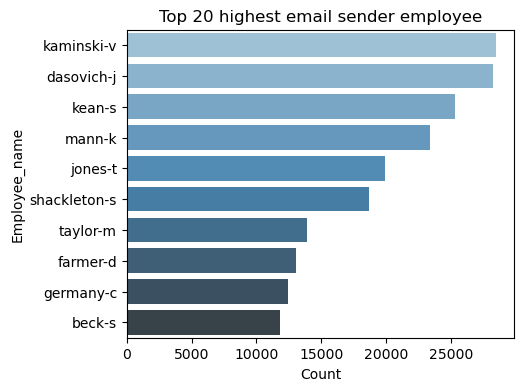

In [20]:
plt.figure(figsize=(5,4))

sns.barplot(y="Employee_name", x="Counts", data=top_10, palette="Blues_d")
plt.title("Top 20 highest email sender employee")
plt.xlabel("Count")
plt.ylabel("Employee_name")
plt.show()

In [21]:
import datetime
from dateutil import parser

# this is sample example
x = parser.parse("Fri, 4 May 2001 13:51:00 -0700 (PDT)")
print(x.strftime("%d-%m-%Y %H:%M:%S"))

04-05-2001 13:51:00


In [22]:
def change_type(dates):
    column = []
    
    for date in dates:
        column.append(parser.parse(date).strftime("%d-%m-%Y %H:%M:%S"))
    return column

df['date'] = change_type(df['date'])
df.head(2)

file                                            message  \
0   allen-p/_sent_mail/1.  Message-ID: <18782981.1075855378110.JavaMail.e...   
1  allen-p/_sent_mail/10.  Message-ID: <15464986.1075855378456.JavaMail.e...   

                  date subject  \
0  14-05-2001 16:39:00           
1  04-05-2001 13:51:00     Re:   

                                            X-Folder           X-From  \
0  \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...  Phillip K Allen   
1  \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...  Phillip K Allen   

                                                X-To  \
0           Tim Belden <Tim Belden/Enron@EnronXGate>   
1  John J Lavorato <John J Lavorato/ENRON@enronXg...   

                                                body employee  
0                          Here is our forecast\n\n   allen-p  
1  Traveling to have a business meeting takes the...  allen-p

In [23]:
print(df['X-Folder'][0])

# we only want last folder name
df['X-Folder'][0].split("\\")[-1]

\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail


"'Sent Mail"

In [24]:
def preprocess_folder(folders):
    column = []
    for folder in folders:
        if (folder is None or folder == ""):
            column.append(np.nan)
        else:
            column.append(folder.split("\\")[-1].lower())
    return column

df['X-Folder'] = preprocess_folder(df['X-Folder'])
df.head(2)

file                                            message  \
0   allen-p/_sent_mail/1.  Message-ID: <18782981.1075855378110.JavaMail.e...   
1  allen-p/_sent_mail/10.  Message-ID: <15464986.1075855378456.JavaMail.e...   

                  date subject    X-Folder           X-From  \
0  14-05-2001 16:39:00          'sent mail  Phillip K Allen   
1  04-05-2001 13:51:00     Re:  'sent mail  Phillip K Allen   

                                                X-To  \
0           Tim Belden <Tim Belden/Enron@EnronXGate>   
1  John J Lavorato <John J Lavorato/ENRON@enronXg...   

                                                body employee  
0                          Here is our forecast\n\n   allen-p  
1  Traveling to have a business meeting takes the...  allen-p

In [25]:
# count unique folders
print("Unique Foldes: ", len(df['X-Folder'].unique()))

# view some of them
df['X-Folder'].unique()[0:20]

Unique Foldes:  1782


array(["'sent mail", 'all documents', 'contacts', 'deleted items',
       'discussion threads', 'inbox', 'notes inbox', 'sent items', 'sent',
       'straw', '2000 conference', 'active international', 'avaya', 'bmc',
       'bridge', 'bristol babcock', 'colleen koenig', 'compaq',
       'computer associates', 'continental airlines'], dtype=object)

In [26]:
def replace_empty_with_nan(subject):
    column = []
    for val in subject:
        if (val == ""):
            column.append(np.nan) 
        else:
            column.append(val)
    return column

In [27]:
df['subject'] = replace_empty_with_nan(df['subject'])
df['X-To'] = replace_empty_with_nan(df['X-To'])

In [28]:
df.isnull().sum()

file            0
message         0
date            0
subject     19187
X-Folder       29
X-From         29
X-To         9153
body            0
employee        0
dtype: int64

In [29]:
# calculate percentage of missing values
miss = df.isnull().sum()
miss = miss[miss>0]
miss = miss / df.shape[0]
miss

subject     0.037083
X-Folder    0.000056
X-From      0.000056
X-To        0.017690
dtype: float64

In [30]:
# drop missing value rows
df.dropna(axis=0, inplace=True)

In [31]:
df.isnull().sum(), df.shape

(file        0
 message     0
 date        0
 subject     0
 X-Folder    0
 X-From      0
 X-To        0
 body        0
 employee    0
 dtype: int64,
 (489236, 9))

In [32]:
df.head(10)

file  \
1     allen-p/_sent_mail/10.   
2    allen-p/_sent_mail/100.   
4   allen-p/_sent_mail/1001.   
5   allen-p/_sent_mail/1002.   
7   allen-p/_sent_mail/1004.   
8    allen-p/_sent_mail/101.   
9    allen-p/_sent_mail/102.   
10   allen-p/_sent_mail/103.   
12   allen-p/_sent_mail/105.   
13   allen-p/_sent_mail/106.   

                                              message                 date  \
1   Message-ID: <15464986.1075855378456.JavaMail.e...  04-05-2001 13:51:00   
2   Message-ID: <24216240.1075855687451.JavaMail.e...  18-10-2000 03:00:00   
4   Message-ID: <30922949.1075863688243.JavaMail.e...  31-08-2000 05:07:00   
5   Message-ID: <30965995.1075863688265.JavaMail.e...  31-08-2000 04:17:00   
7   Message-ID: <17189699.1075863688308.JavaMail.e...  14-07-2000 06:59:00   
8   Message-ID: <20641191.1075855687472.JavaMail.e...  17-10-2000 02:26:00   
9   Message-ID: <30795301.1075855687494.JavaMail.e...  16-10-2000 06:44:00   
10  Message-ID: <33076797.1075855687515.JavaMail.e...  16-10-2000 06:42:00   
12  Message-ID: <13116875.1075855687561.JavaMail.e...  09-10-2000 07:16:00   
13  Message-ID: <2707340.1075855687584.JavaMail.ev...  09-10-2000 07:00:00   

                                              subject    X-Folder  \
1                                                 Re:  'sent mail   
2                                            Re: test  'sent mail   
4                                           Re: Hello  'sent mail   
5                                           Re: Hello  'sent mail   
7                        Re: PRC review - phone calls  'sent mail   
8                      Re: High Speed Internet Access  'sent mail   
9   FW: fixed forward or other Collar floor gas pr...  'sent mail   
10  Re: FW: fixed forward or other Collar floor ga...  'sent mail   
12        Consolidated positions: Issues & To Do list  'sent mail   
13        Consolidated positions: Issues & To Do list  'sent mail   

             X-From                                               X-To  \
1   Phillip K Allen  John J Lavorato <John J Lavorato/ENRON@enronXg...   
2   Phillip K Allen                                   Leah Van Arsdall   
4   Phillip K Allen                                         Greg Piper   
5   Phillip K Allen                                         Greg Piper   
7   Phillip K Allen                                     Joyce Teixeira   
8   Phillip K Allen                                         Mark Scott   
9   Phillip K Allen                                    zimam@enron.com   
10  Phillip K Allen  "Buckner, Buck" <buck.buckner@honeywell.com> @...   
12  Phillip K Allen                                        Keith Holst   
13  Phillip K Allen                                        Keith Holst   

                                                 body employee  
1   Traveling to have a business meeting takes the...  allen-p  
2                      test successful.  way to go!!!  allen-p  
4                 Let's shoot for Tuesday at 11:45.    allen-p  
5   Greg,\n\n How about either next Tuesday or Thu...  allen-p  
7                    any morning between 10 and 11:30  allen-p  
8   1. login:  pallen pw: ke9davis\n\n I don't thi...  allen-p  
9   ---------------------- Forwarded by Phillip K ...  allen-p  
10  Mr. Buckner,\n\n For delivered gas behind San ...  allen-p  
12  ---------------------- Forwarded by Phillip K ...  allen-p  
13  ---------------------- Forwarded by Phillip K ...  allen-p

In [33]:
cols_to_drop = ['file','message','date','message','X-Folder','X-To','X-From']

In [34]:
df.drop(cols_to_drop, axis=1, inplace=True)

In [35]:
df.head()

subject  \
1                           Re:   
2                      Re: test   
4                     Re: Hello   
5                     Re: Hello   
7  Re: PRC review - phone calls   

                                                body employee  
1  Traveling to have a business meeting takes the...  allen-p  
2                     test successful.  way to go!!!  allen-p  
4                Let's shoot for Tuesday at 11:45.    allen-p  
5  Greg,\n\n How about either next Tuesday or Thu...  allen-p  
7                   any morning between 10 and 11:30  allen-p

In [36]:
df.tail()

subject  \
517396   Trade with John Lavorato   
517397                 Gas Hedges   
517398           RE: CONFIDENTIAL   
517399  Calgary Analyst/Associate   
517400           RE: ali's essays   

                                                     body    employee  
517396  This is a trade with OIL-SPEC-HEDGE-NG (John L...  zufferli-j  
517397  Some of my position is with the Alberta Term b...  zufferli-j  
517398  2\n\n -----Original Message-----\nFrom: \tDouc...  zufferli-j  
517399  Analyst\t\t\t\t\tRank\n\nStephane Brodeur\t\t\...  zufferli-j  
517400  i think the YMCA has a class that is for peopl...  zufferli-j

In [37]:
cols_to_drop = ['subject']

In [38]:
df.drop(cols_to_drop , axis=1 , inplace=True)

In [40]:
df.tail()

body    employee
517396  This is a trade with OIL-SPEC-HEDGE-NG (John L...  zufferli-j
517397  Some of my position is with the Alberta Term b...  zufferli-j
517398  2\n\n -----Original Message-----\nFrom: \tDouc...  zufferli-j
517399  Analyst\t\t\t\t\tRank\n\nStephane Brodeur\t\t\...  zufferli-j
517400  i think the YMCA has a class that is for peopl...  zufferli-j

In [41]:
# save the data
df.to_csv("cleaned_data.csv", index=False)

In [42]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

# Example DataFrame
df = pd.read_csv('cleaned_data.csv')  # Load your dataset here

# Preprocess the data
nltk.download('wordnet')
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Lowercasing
    text = text.lower()
    # Remove non-alphabetic characters
    text = re.sub('[^a-z]', ' ', text)
    # Lemmatization and stopword removal
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

df['processed_body'] = df['body'].apply(preprocess)

# Apply TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features
tfidf_matrix = vectorizer.fit_transform(df['processed_body'])

# Spam/Ham Classification (Simple Heuristic)
# Note: Replace this with a proper model for real applications
def classify_email(text):
    # Example heuristic: classify based on specific keywords
    spam_keywords = ['free', 'offer', 'winner', 'urgent', 'money']
    if any(keyword in text for keyword in spam_keywords):
        return 'spam'
    return 'ham'

df['label'] = df['processed_body'].apply(classify_email)

# The DataFrame now has a new column 'label' with 'spam' or 'ham'
print(df.head())


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vedan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vedan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                body employee  \
0  Traveling to have a business meeting takes the...  allen-p   
1                     test successful.  way to go!!!  allen-p   
2                Let's shoot for Tuesday at 11:45.    allen-p   
3  Greg,\n\n How about either next Tuesday or Thu...  allen-p   
4                   any morning between 10 and 11:30  allen-p   

                                      processed_body label  
0  traveling business meeting take fun trip espec...   ham  
1                             test successful way go   ham  
2                                  let shoot tuesday   ham  
3          greg either next tuesday thursday phillip   ham  
4                                            morning   ham  


In [43]:
import pandas as pd

# Assuming df is your DataFrame with the 'employee' and 'label' columns
# where 'label' is the classification result ('ham' or 'spam')

# Group by 'employee' and count the number of 'ham' and 'spam'
email_counts = df.groupby(['employee', 'label']).size().unstack(fill_value=0)

# Calculate top 10 ham and top 10 spam accounts
top_10_ham = email_counts['ham'].nlargest(10)
top_10_spam = email_counts['spam'].nlargest(10)

print("Top 10 Ham Accounts:\n", top_10_ham)
print("\nTop 10 Spam Accounts:\n", top_10_spam)


Top 10 Ham Accounts:
 employee
kaminski-v      21298
mann-k          20590
dasovich-j      19659
kean-s          18213
jones-t         18028
shackleton-s    15668
farmer-d        11578
taylor-m        11055
germany-c       10761
beck-s          10040
Name: ham, dtype: int64

Top 10 Spam Accounts:
 employee
dasovich-j      6816
kaminski-v      6028
kean-s          5348
shackleton-s    2835
taylor-m        2426
mann-k          2207
lay-k           2186
bass-e          2174
scott-s         1932
jones-t         1714
Name: spam, dtype: int64


In [44]:
# save the data
df.to_csv("emailss.csv", index=False)

In [45]:
df.head()

body employee  \
0  Traveling to have a business meeting takes the...  allen-p   
1                     test successful.  way to go!!!  allen-p   
2                Let's shoot for Tuesday at 11:45.    allen-p   
3  Greg,\n\n How about either next Tuesday or Thu...  allen-p   
4                   any morning between 10 and 11:30  allen-p   

                                      processed_body label  
0  traveling business meeting take fun trip espec...   ham  
1                             test successful way go   ham  
2                                  let shoot tuesday   ham  
3          greg either next tuesday thursday phillip   ham  
4                                            morning   ham

In [46]:
cols_to_drop = ['body']

In [47]:
df.drop(cols_to_drop , axis=1 , inplace=True)

In [48]:
df.head()

employee                                     processed_body label
0  allen-p  traveling business meeting take fun trip espec...   ham
1  allen-p                             test successful way go   ham
2  allen-p                                  let shoot tuesday   ham
3  allen-p          greg either next tuesday thursday phillip   ham
4  allen-p                                            morning   ham

In [49]:
df.rename(columns={'processed_body': 'body'}, inplace=True)

In [50]:
df.head()

employee                                               body label
0  allen-p  traveling business meeting take fun trip espec...   ham
1  allen-p                             test successful way go   ham
2  allen-p                                  let shoot tuesday   ham
3  allen-p          greg either next tuesday thursday phillip   ham
4  allen-p                                            morning   ham

In [51]:
# save the data
df.to_csv("emailss.csv", index=False)